In [1]:
kwh = 354000
pf = 0.60
kvah = kwh/pf
kvarh = (kvah**2 - kwh**2)**0.5
pfCalc = kwh/(kvarh**2 + kwh**2)**0.5
[kvah,kvarh,kwh,pfCalc]

[590000.0, 472000.0, 354000, 0.6]

In [2]:
import math

kwh = 354000
pf = 0.60
ang = math.acos(pf)
kvarh = kvah * math.sin(ang)
print('KWH: '+str(kwh)+'\n'+'KVAH: '+str(kvah)+'\n' \
      +'KVARH: '+str(kvarh)+'\n'+ 'PF: '+str(pf)+'\n'+'Angle: '+str(ang*180/math.pi))

KWH: 354000
KVAH: 590000.0
KVARH: 472000.0
PF: 0.6
Angle: 53.13010235415598


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import matplotlib.dates as mdates
import math
import numpy as np

dfk = pd.read_csv('tnebBillKrss.csv')
dfa = pd.read_csv('tnebBillArss.csv')

dfk.columns = ['Month', 'Year', 'KWH', 'KVAH', 'PF', 'MD', 'Billed', 'Paid', 'PF_penalty', 
               'Harmonics_penalty', 'MD_penalty']
dfa.columns = ['Month', 'Year', 'KWH', 'KVAH', 'PF', 'MD', 'Billed', 'Paid', 'PF_penalty', 
               'Harmonics_penalty', 'MD_penalty']

In [4]:
print('AT KRSS: '+'\n' + 
      'PF Penalty: '+format(int(dfk['PF_penalty'].sum()), ',d')+'\n'+
      'Harmonics Penalty: '+format(dfk['Harmonics_penalty'].sum(), ',d')+'\n'+
      'MD Penalty: '+format(dfk['MD_penalty'].sum(), ',d') +'\n' )
print('AT ARSS: '+'\n' + 
      'PF Penalty: '+format(int(dfa['PF_penalty'].sum()), ',d')+'\n'+
      'Harmonics Penalty: '+format(dfa['Harmonics_penalty'].sum(), ',d')+'\n'+
      'MD Penalty: '+format(dfa['MD_penalty'].sum(), ',d') +'\n' )
print('Total: '+'\n' + 
      'PF Penalty: '+format(int(dfk['PF_penalty'].sum()+dfa['PF_penalty'].sum()), ',d')+'\n'+
      'Harmonics Penalty: '+format(dfk['Harmonics_penalty'].sum()+dfa['Harmonics_penalty'].sum(), ',d')+'\n'+
      'MD Penalty: '+format(dfk['MD_penalty'].sum()+dfa['MD_penalty'].sum(), ',d')+'\n'+
     'Total Penalty: '+format(int(dfk['PF_penalty'].sum())+int(dfa['PF_penalty'].sum())+
                          dfk['Harmonics_penalty'].sum()+dfa['Harmonics_penalty'].sum()+
                          dfk['MD_penalty'].sum()+dfa['MD_penalty'].sum(), ',d'))

AT KRSS: 
PF Penalty: 53,277,425
Harmonics Penalty: 27,535,350
MD Penalty: 13,033,435

AT ARSS: 
PF Penalty: 37,591,125
Harmonics Penalty: 221,127
MD Penalty: 6,440,000

Total: 
PF Penalty: 90,868,550
Harmonics Penalty: 27,756,477
MD Penalty: 19,473,435
Total Penalty: 138,098,462


In [5]:
print('TNEB Billing: '+'\n' +
      'KRSS total billed: '+format(int(dfk['Billed'].sum()), ',d')+'\n'+
     'ARSS total billed: '+format(int(dfa['Billed'].sum()), ',d')+'\n'+
     'Total billed till date: '+format(int(dfk['Billed'].sum())+int(dfa['Billed'].sum()), ',d') +'\n' )
print('CMRL payment as per TNERC ruling: '+'\n' +
      'KRSS total Paid: '+format(int(dfk['Paid'].sum()), ',d')+'\n'+
     'ARSS total Paid: '+format(int(dfa['Paid'].sum()), ',d')+'\n'+
     'Total paid till date: '+format(int(dfk['Paid'].sum())+int(dfa['Paid'].sum()), ',d'))

TNEB Billing: 
KRSS total billed: 637,350,154
ARSS total billed: 463,373,327
Total billed till date: 1,100,723,481

CMRL payment as per TNERC ruling: 
KRSS total Paid: 547,788,581
ARSS total Paid: 364,526,366
Total paid till date: 912,314,947


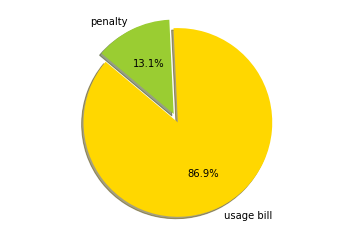

In [6]:
labels = 'usage bill', 'penalty'
bill = [int(dfk['Paid'].sum())+int(dfa['Paid'].sum()), int(dfk['PF_penalty'].sum()+dfa['PF_penalty'].sum())+
                          dfk['Harmonics_penalty'].sum()+dfa['Harmonics_penalty'].sum()+
                          dfk['MD_penalty'].sum()+dfa['MD_penalty'].sum()]
colors = ['gold', 'yellowgreen']
explode = (0, 0.1)
plt.pie(bill, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

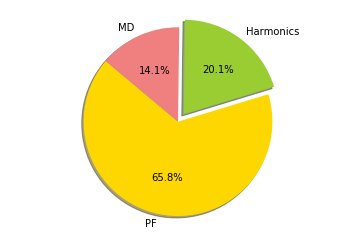

In [7]:
labels = 'PF', 'Harmonics', 'MD'
bill = [int(dfk['PF_penalty'].sum()+dfa['PF_penalty'].sum()),
        int(dfk['Harmonics_penalty'].sum()+dfa['Harmonics_penalty'].sum()),
        int(dfk['MD_penalty'].sum()+dfa['MD_penalty'].sum())]
colors = ['gold', 'yellowgreen','lightcoral']
explode = (0, 0.1, 0)
plt.pie(bill, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [8]:
# Split into different stages of commissioning
bk1=dfk[(dfk['Year'] == 2013) | (dfk['Year'] == 2014) \
        | ((dfk['Year'] == 2015) & (dfk['Month'] < 7))]  [['Billed', 'Paid']] #Stage 1
bk2=dfk[((dfk['Year'] == 2015) & (dfk['Month'] > 6)) \
        | ((dfk['Year'] == 2016) & (dfk['Month'] < 9))]  [['Billed', 'Paid']] #Stage 1A
bk3=dfk[((dfk['Year'] == 2016) & (dfk['Month'] > 8)) \
        | ((dfk['Year'] == 2017) & (dfk['Month'] < 5))]  [['Billed', 'Paid']] #Stage 2A
bk4=dfk[((dfk['Year'] == 2017) & (dfk['Month'] > 4)) \
        | ((dfk['Year'] == 2018) & (dfk['Month'] < 5))]  [['Billed', 'Paid']] #Stage 2B
bk5=dfk[((dfk['Year'] == 2018) & (dfk['Month'] > 4)) ]  [['Billed', 'Paid']] 
ba1=dfa[(dfa['Year'] == 2013) | (dfa['Year'] == 2014) \
        | ((dfa['Year'] == 2015) & (dfa['Month'] < 7))]  [['Billed', 'Paid']] #Stage 1
ba2=dfa[((dfa['Year'] == 2015) & (dfa['Month'] > 6)) \
        | ((dfa['Year'] == 2016) & (dfa['Month'] < 9))]  [['Billed', 'Paid']] #Stage 1A
ba3=dfa[((dfa['Year'] == 2016) & (dfa['Month'] > 8)) \
        | ((dfa['Year'] == 2017) & (dfa['Month'] < 5))]  [['Billed', 'Paid']] #Stage 2A
ba4=dfa[((dfa['Year'] == 2017) & (dfa['Month'] > 4)) \
        | ((dfa['Year'] == 2018) & (dfa['Month'] < 5))]  [['Billed', 'Paid']] #Stage 2B
ba5=dfa[((dfa['Year'] == 2018) & (dfa['Month'] > 4)) ]  [['Billed', 'Paid']] 

# Take the mean values for different stages. Populate list with mean values
avg_bill_paid = []
firstMean = (bk1['Paid'].mean() + ba1['Paid'].mean())//1
for i in bk1['Paid']:
    avg_bill_paid.append((bk1['Paid'].mean() + ba1['Paid'].mean())//1)
for i in bk2['Paid']:
    avg_bill_paid.append((bk2['Paid'].mean() + ba2['Paid'].mean())//1)
for i in bk3['Paid']:
    avg_bill_paid.append((bk3['Paid'].mean() + ba3['Paid'].mean())//1)
for i in bk4['Paid']:
    avg_bill_paid.append((bk4['Paid'].mean() + ba4['Paid'].mean())//1)
for i in bk5['Paid']:
    avg_bill_paid.append((bk5['Paid'].mean() + ba5['Paid'].mean())//1)

ValueError: x and y must have same first dimension, but have shapes (68,) and (59,)

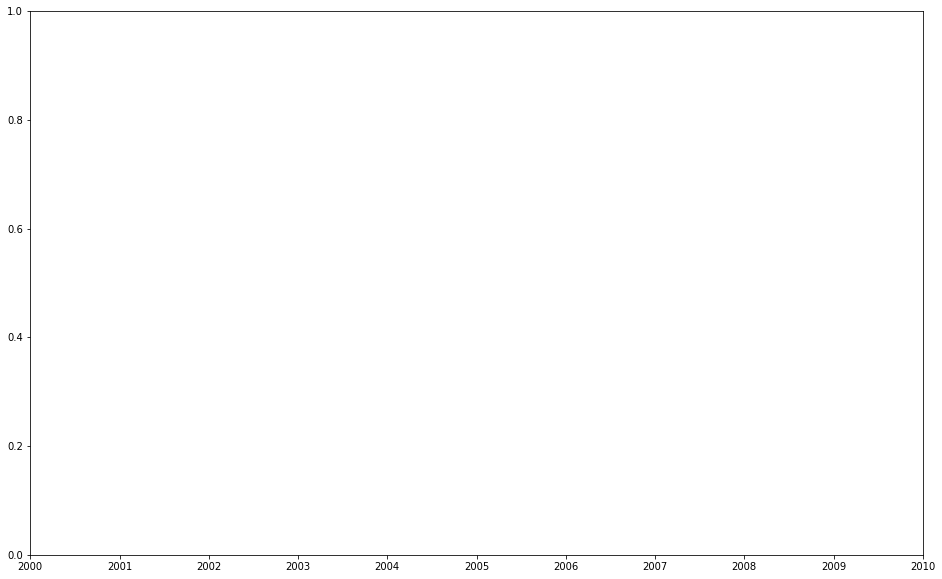

In [9]:
# Plot the graph
x = pd.DatetimeIndex(start = '2013-08-01',end = dt.date.today() , freq = 'MS')
yb = dfk['Billed'] + dfa['Billed']
yp = dfk['Paid'] + dfa['Paid']

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y') # X axis will show only years

fig, ax = plt.subplots(figsize=(16,10)) # Plot size
ax.plot(x[:-1],yb, linewidth=1.00, label="Billed by TNEB") # Plot for TNEB Bills
ax.plot(x[:-1],yp, linewidth=2.00, label="Paid by CMRL") # Plot for actual payments
ax.plot(x[:-1],avg_bill_paid, linewidth=3.00, label="") # Plot for mean value steps representing different stages
plt.legend(bbox_to_anchor=(0.05, 0.9, 0.7, .102), loc=3, fontsize=18,
           ncol=2, mode="expand", borderaxespad=0.) # Placement of legends
ax.set_title('Energy Bill', fontsize=24);

ax.grid(color='b', linestyle='-', linewidth=0.2, alpha=0.3, which='both', axis='both')
ax.xaxis.set_major_locator(years) # Major ticks 
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months) # Minor ticks

In [ ]:
#fig.savefig("energyBill.png", dpi=200)

In [ ]:
#[len(avg_bill_paid),bk1.shape, bk2.shape, bk3.shape, bk4.shape, bk5.shape]

In [ ]:
pk = dfk[(dfk['Year'] > 2013)] [['Month','Year','PF_penalty','Harmonics_penalty','MD_penalty']]
pa = dfa[(dfa['Year'] > 2013)] [['Month','Year','PF_penalty','Harmonics_penalty','MD_penalty']]

ppf = pk['PF_penalty'] + pa['PF_penalty'] # Power factor penalty
ph = pk['Harmonics_penalty'] + pa['Harmonics_penalty'] # Harmonics Penalty
pmd = pk['MD_penalty'] + pa['MD_penalty'] # MD Penalty

stg = [] # Array to store stages of operation

# Start of period 1.1.2014. Stage 1 started 17 months later
stg1 = np.arange(0, 17, 1)
for i in stg1:
    stg.append(1100000)
#Stage 1A started 16 months later
stg1a = np.arange(0, 16, 1)
for i in stg1a:
    stg.append(1500000)
#Stage 2A started 7 months later
stg2a = np.arange(0, 7, 1)
for i in stg2a:
    stg.append(1900000)
#Stage 2B started 12 months later
stg2b = np.arange(0, 12, 1)
for i in stg2b:
    stg.append(2300000)
#Stage 2C prepartions
stg2c = np.arange(0, 2, 1) # increase the month interval every month
for i in stg2c:
    stg.append(2700000)

x = pd.DatetimeIndex(start = '2014-01-01',end = dt.date.today() , freq = 'MS')
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y') # X axis will show only years

fig, ax = plt.subplots(figsize=(16,10)) # Plot size
ax.plot(x[:-1],ppf, linewidth=2.00, label="Power Factor") # Leading PF
ax.plot(x[:-1],ph, linewidth=2.00, label="Harmonics") # Harmonics above 8%
ax.plot(x[:-1],pmd, linewidth=2.00, label="Maximum Demand") # Exceeded contracted demand
ax.plot(x[:-1],stg, linewidth=3.00, label="") # Exceeded contracted demand
plt.legend(bbox_to_anchor=(0.05, 0.9, 0.7, .102), loc=3, fontsize=18,
           ncol=2, mode="expand", borderaxespad=0.) # Placement of legends
ax.set_title('Penalty', fontsize=24);

ax.grid(color='b', linestyle='-', linewidth=0.5, alpha=0.3, which='both', axis='both')
ax.xaxis.set_major_locator(years) # Major ticks 
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months) # Minor ticks